In [2]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [3]:
g = LoadConnectome2()
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
top_50_strs = SparkMetaBias.index.values[:50]
top_nodes = g.vs.select(label_in=top_50_strs)
g2 = g.subgraph(top_50_strs)
str2reg, reg2str = LoadSTR2REG()

/Users/jiayao/anaconda3/lib/python3.7/site-packages/igraph/__init__.py:4553: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  "in": lambda a, b: a in b,


In [4]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Cartesian_distancesDF.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.000000,4863.769115,4506.176317,1962.937849,3232.355952,1748.392118,3235.061823,2301.358295,2608.759284,6435.351583,...,6063.311801,6155.942251,6426.702109,2283.774288,2068.967134,2349.201992,2592.898957,2759.189192,3062.168349,7146.415185
Anterior_cingulate_area_dorsal_part,4863.769115,0.000000,695.071939,3821.730629,2093.591412,4451.755272,3458.052197,4909.811605,3827.613486,8904.984559,...,5175.664209,5912.116795,5422.983496,3758.739815,5058.964815,3659.405689,3555.014065,3870.481236,4931.848031,8729.762311


In [5]:
# ASD bootstraped edges

TopN = 10

Edges_asd_boot = {}
Node_asd_boot = {}
asd_boot_dir = "dat/Bootstrap_Match/asd.boot.bias.z2/"
N_boot = 0
for file in os.listdir(asd_boot_dir):
    if file.startswith("boot.muts"):
        continue
    df = pd.read_csv(asd_boot_dir+file, index_col="STR")
    N_boot += 1
    top_50_strs = df.index.values[:TopN]
    for node in top_50_strs:
        if node not in Node_asd_boot:
            Node_asd_boot[node] = 0
        Node_asd_boot[node] += 1
    top_nodes = g.vs.select(label_in=top_50_strs)
    g2 = g.subgraph(top_nodes)
    
    for e in g2.es:
        src, tgt = g2.vs[e.source]["label"], g2.vs[e.target]["label"]
        edge = "{}-{}".format(src, tgt)
        if edge not in Edges_asd_boot:
            Edges_asd_boot[edge] = 0
        Edges_asd_boot[edge] += 1

In [6]:
EdgeProbdat = []
for i, (Edge, Prob) in enumerate(sorted(Edges_asd_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    src, tgt = Edge.split("-")
    if str2reg[src] == str2reg[tgt]:
        SameReg = 1
    else:
        SameReg = 0
    dist= Cartesian_distancesDF.loc[src, tgt]
    EdgeProbdat.append([i+1, src, tgt, dist, SameReg, Prob/1000])
ASD_EdgeProbDF = pd.DataFrame(data=EdgeProbdat, columns=["Rank", "Source", "Target", "Dist", "SameReg",
                                                     "Prob"])
ASD_EdgeProbDF.to_csv("../EdgeProb.ASD.Top50.Boot.csv")

In [7]:
ASD_EdgeProbDF.head(10)

,Rank,Source,Target,Dist,SameReg,Prob
0,1,Orbital_area_lateral_part,Prelimbic_area,1594.913791,1,0.889
1,2,Basomedial_amygdalar_nucleus,Lateral_amygdalar_nucleus,1310.772673,1,0.583
2,3,Lateral_amygdalar_nucleus,Basomedial_amygdalar_nucleus,1310.772673,1,0.583
3,4,Lateral_amygdalar_nucleus,Intercalated_amygdalar_nucleus,1384.963898,1,0.519
4,5,Orbital_area_lateral_part,Orbital_area_ventrolateral_part,580.409338,1,0.474
5,6,Orbital_area_ventrolateral_part,Orbital_area_lateral_part,580.409338,1,0.474
6,7,Prelimbic_area,Endopiriform_nucleus_dorsal_part,4295.491823,0,0.331
7,8,Nucleus_of_reuniens,Lateral_amygdalar_nucleus,3530.226622,0,0.234
8,9,Claustrum,Lateral_amygdalar_nucleus,2735.415873,0,0.222
9,10,Orbital_area_lateral_part,Claustrum,2355.313143,0,0.221


In [8]:
# ASD bootstraped edges
ASD_Neg = pd.read_csv("dat/bias2/ASD.Neg.Z2.csv", index_col="STR")

Edges_neg_boot = {}
Node_neg_boot = {}
neg_boot_dir = "/Users/jiayao/Work/ASD_Circuits/src/dat/Bootstrap_Match/Bootstrap/ASD/"
N_boot = 0
for file in os.listdir(neg_boot_dir):
    if not file.startswith("ASD.Neg.Z2"):
        continue
    df = pd.read_csv(neg_boot_dir+file, index_col="STR")
    N_boot += 1
    top_50_strs = df.index.values[:TopN]
    for node in top_50_strs:
        if node not in Node_neg_boot:
            Node_neg_boot[node] = 0
        Node_neg_boot[node] += 1
    top_nodes = g.vs.select(label_in=top_50_strs)
    g2 = g.subgraph(top_nodes)
    
    for e in g2.es:
        src, tgt = g2.vs[e.source]["label"], g2.vs[e.target]["label"]
        edge = "{}-{}".format(src, tgt)
        if edge not in Edges_neg_boot:
            Edges_neg_boot[edge] = 0
        Edges_neg_boot[edge] += 1

In [9]:
NodeProbdat = []
for i, (Node, Prob) in enumerate(sorted(Node_neg_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    #print(i+1, Node, Prob/1000)
    NodeProbdat.append([i+1, Node, Prob/1000])
Neg_NodeProbDF = pd.DataFrame(data=NodeProbdat, columns=["ProbRank", "Node", "Prob"])
Neg_NodeProbDF = Neg_NodeProbDF.set_index("Node")

EdgeProbdat = []
for i, (Edge, Prob) in enumerate(sorted(Edges_neg_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    src, tgt = Edge.split("-")
    if str2reg[src] == str2reg[tgt]:
        SameReg = 1
    else:
        SameReg = 0
    dist= Cartesian_distancesDF.loc[src, tgt]
    EdgeProbdat.append([i+1, src, tgt, dist, SameReg, Prob/1000])
Neg_EdgeProbDF = pd.DataFrame(data=EdgeProbdat, columns=["Rank", "Source", "Target", "Dist", "SameReg",
                                                     "Prob"])
Neg_EdgeProbDF.to_csv("../EdgeProb.ASD.Top50.Boot.csv")

In [10]:
NodeProbdat = []
for i, (Node, Prob) in enumerate(sorted(Node_asd_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    #print(i+1, Node, Prob/1000)
    NodeProbdat.append([i+1, Node, Prob/1000])
ASD_NodeProbDF = pd.DataFrame(data=NodeProbdat, columns=["ProbRank", "Node", "Prob"])
ASD_NodeProbDF = ASD_NodeProbDF.set_index("Node")

In [11]:
asd_bias_DF = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
ASD_NodeProbDF = pd.concat([asd_bias_DF,ASD_NodeProbDF], axis=1, join="inner")
ASD_NodeProbDF.to_csv("../NodeProb.ASD.Top50.Boot.csv")

In [12]:
ASD_NodeProbDF.head(2)

,EFFECT,REGION,Rank,ProbRank,Prob
Lateral_amygdalar_nucleus,0.523800,Amygdalar,1,1,0.996
Orbital_area_lateral_part,0.513619,Isocortex,2,2,0.994


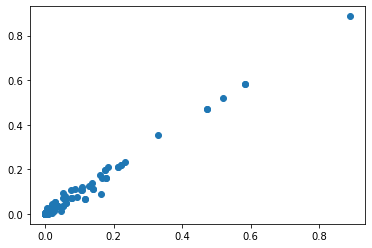

In [13]:
X, Y = [], []
for i,row in ASD_EdgeProbDF.iterrows():
    X.append(row["Prob"])
    Y.append(ASD_NodeProbDF.loc[row["Source"], "Prob"] * 
             ASD_NodeProbDF.loc[row["Target"], "Prob"])
plt.scatter(X,Y)

In [14]:
X, Y = [], []
for i,row in Sib_EdgeProbDF.iterrows():
    X.append(row["Prob"])
    Y.append(Sib_NodeProbDF.loc[row["Source"], "Prob"] * 
             Sib_NodeProbDF.loc[row["Target"], "Prob"])
plt.scatter(X,Y)

NameError: name 'Sib_EdgeProbDF' is not defined

In [15]:
pearsonr(X,Y)

ValueError: x and y must have length at least 2.

In [25]:
# sib bootstraped edges

Edges_sib_boot = {}
Node_sib_boot = {}
sib_boot_dir = "dat/Bootstrap_Match/Sib.boot.Z2.bias/"
N_boot = 0
for file in os.listdir(sib_boot_dir):
    if file.startswith("boot.muts"):
        continue
    df = pd.read_csv(sib_boot_dir+file, index_col="STR")
    N_boot += 1
    top_50_strs = df.index.values[:TopN]
    for node in top_50_strs:
        if node not in Node_sib_boot:
            Node_sib_boot[node] = 0
        Node_sib_boot[node] += 1
    top_nodes = g.vs.select(label_in=top_50_strs)
    g2 = g.subgraph(top_nodes)
    
    for e in g2.es:
        src, tgt = g2.vs[e.source]["label"], g2.vs[e.target]["label"]
        edge = "{}-{}".format(src, tgt)
        if edge not in Edges_sib_boot:
            Edges_sib_boot[edge] = 0
        Edges_sib_boot[edge] += 1

In [26]:
NodeProbdat = []

for i, (Node, Prob) in enumerate(sorted(Node_sib_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    #print(i+1, Node, Prob/1000)
    Region = str2reg[Node]
    NodeProbdat.append([i+1, Node, Prob/1000])
Sib_NodeProbDF = pd.DataFrame(data=NodeProbdat, columns=["ProbRank", "STR", "Prob"])
Sib_NodeProbDF = Sib_NodeProbDF.set_index("STR")


In [27]:
sib_bias_DF = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
Sib_NodeProbDF = pd.concat([sib_bias_DF,Sib_NodeProbDF], axis=1, join="inner")
Sib_NodeProbDF.to_csv("../NodeProb.Sib.Top50.Boot.csv")

In [28]:
Sib_NodeProbDF.head(50)

,EFFECT,REGION,Rank,ProbRank,Prob
STR,,,,,
Posterior_limiting_nucleus_of_the_thalamus,0.129408,Thalamus,1,2,0.840
Anterior_pretectal_nucleus,0.128708,Midbrain,2,1,0.851
Lateral_dorsal_nucleus_of_thalamus,0.117249,Thalamus,3,3,0.740
Lateral_posterior_nucleus_of_the_thalamus,0.103705,Thalamus,4,4,0.582
Rhomboid_nucleus,0.102324,Thalamus,5,6,0.489
Lateral_septal_nucleus_rostral_rostroventral_part,0.101827,Striatum,6,5,0.505
Intermediodorsal_nucleus_of_the_thalamus,0.095745,Thalamus,7,10,0.364
Nucleus_of_reuniens,0.095545,Thalamus,8,12,0.332
Paraventricular_nucleus_of_the_thalamus,0.095161,Thalamus,9,11,0.339


In [29]:
EdgeProbdat = []
for i, (Edge, Prob) in enumerate(sorted(Edges_sib_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    src, tgt = Edge.split("-")
    dist= Cartesian_distancesDF.loc[src, tgt]
    if str2reg[src] == str2reg[tgt]:
        SameReg = 1
    else:
        SameReg = 0
    EdgeProbdat.append([i+1, src, tgt, dist, SameReg, Prob/1000])
Sib_EdgeProbDF = pd.DataFrame(data=EdgeProbdat, columns=["Rank", "Source", "Target", "Dist", "SameReg",
                                                     "Prob"])
Sib_EdgeProbDF.to_csv("../EdgeProb.ASD.Top50.Boot.csv")

In [30]:
EdgeProbdat = []
for i, (Edge, Prob) in enumerate(sorted(Edges_sib_boot.items(), 
                                        key=lambda x:x[1], reverse=True)):
    src, tgt = Edge.split("-")
    dist= Cartesian_distancesDF.loc[src, tgt]
    if str2reg[src] == str2reg[tgt]:
        SameReg = 1
    else:
        SameReg = 0
    EdgeProbdat.append([i+1, src, tgt, dist, SameReg, Prob/1000])
Sib_EdgeProbDF = pd.DataFrame(data=EdgeProbdat, columns=["Rank", "Source", "Target", "Dist", "SameReg",
                                                     "Prob"])
Sib_EdgeProbDF.to_csv("../EdgeProb.ASD.Top50.Boot.csv")

In [31]:
ASD_NodeProbDF = ASD_NodeProbDF.sort_values("ProbRank")
Sib_NodeProbDF = Sib_NodeProbDF.sort_values("ProbRank")

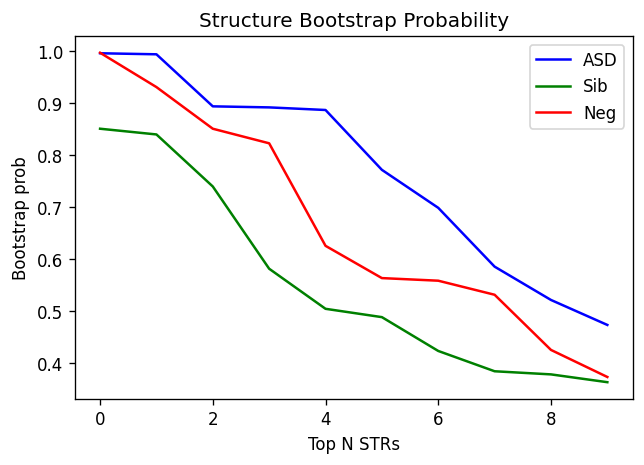

In [34]:
plt.figure(dpi=120)
#plt.plot(ASD_NodeProbDF.head(50)["Prob"].values, label="ASD", color="blue")
#plt.plot(Sib_NodeProbDF.head(50)["Prob"].values, label="Sib", color="green")

plt.plot(ASD_NodeProbDF.head(TopN)["Prob"].values, label="ASD", color="blue")
plt.plot(Sib_NodeProbDF.head(TopN)["Prob"].values, label="Sib", color="green")
plt.plot(Neg_NodeProbDF.head(TopN)["Prob"].values, label="Neg", color="red")

plt.legend()
plt.title("Structure Bootstrap Probability")
plt.xlabel("Top N STRs")
plt.ylabel("Bootstrap prob")
plt.show()

In [33]:
mannwhitneyu(ASD_NodeProbDF.head(50)["Prob"].values, Sib_NodeProbDF.head(50)["Prob"].values)

MannwhitneyuResult(statistic=909.5, pvalue=0.23240803705924362)

4 0


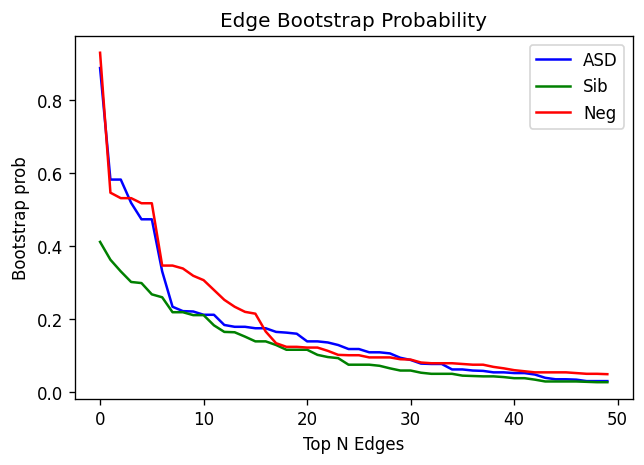

In [36]:
print(ASD_EdgeProbDF[ASD_EdgeProbDF["Prob"]>0.5].shape[0], 
      Sib_EdgeProbDF[Sib_EdgeProbDF["Prob"]>0.5].shape[0])
plt.figure(dpi=120)
plt.plot(ASD_EdgeProbDF.head(50)["Prob"].values, label="ASD", color="blue")
plt.plot(Sib_EdgeProbDF.head(50)["Prob"].values, label="Sib", color="green")
plt.plot(Neg_EdgeProbDF.head(50)["Prob"].values, label="Neg", color="red")
plt.legend()
plt.title("Edge Bootstrap Probability")
plt.xlabel("Top N Edges")
plt.ylabel("Bootstrap prob")
plt.show()

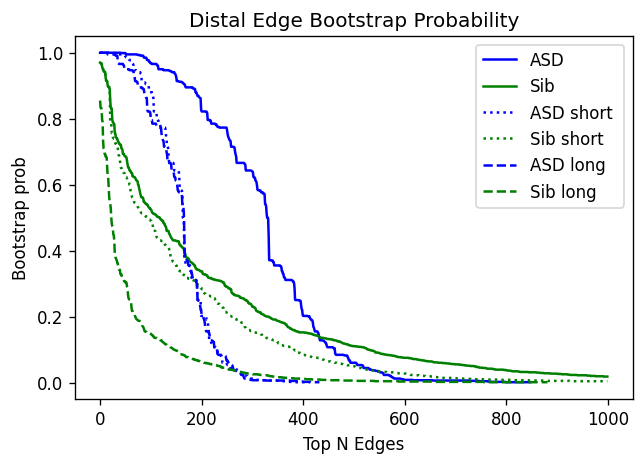

In [34]:
# Long Dist
plt.figure(dpi=120)
asd_short = ASD_EdgeProbDF[ASD_EdgeProbDF["Dist"]<3000]
sib_short = Sib_EdgeProbDF[Sib_EdgeProbDF["Dist"]<3000]

asd_long = ASD_EdgeProbDF[ASD_EdgeProbDF["Dist"]>3000]
sib_long = Sib_EdgeProbDF[Sib_EdgeProbDF["Dist"]>3000]

#print(xx1[xx1["Prob"]>0.5].shape[0], xx2[xx2["Prob"]>0.5].shape[0])
plt.plot(ASD_EdgeProbDF.head(1000)["Prob"].values, label="ASD", color="blue", )
plt.plot(Sib_EdgeProbDF.head(1000)["Prob"].values, label="Sib", color="green")

plt.plot(asd_short.head(1000)["Prob"].values, label="ASD short ", color="blue", ls="dotted")
plt.plot(sib_short.head(1000)["Prob"].values, label="Sib short ", color="green", ls="dotted")

plt.plot(asd_long.head(1000)["Prob"].values, label="ASD long ", color="blue", ls="dashed")
plt.plot(sib_long.head(1000)["Prob"].values, label="Sib long ", color="green", ls="dashed")

plt.legend()
plt.title("Distal Edge Bootstrap Probability")
plt.xlabel("Top N Edges")
plt.ylabel("Bootstrap prob")
plt.show()

In [35]:
166/23

7.217391304347826

99 31


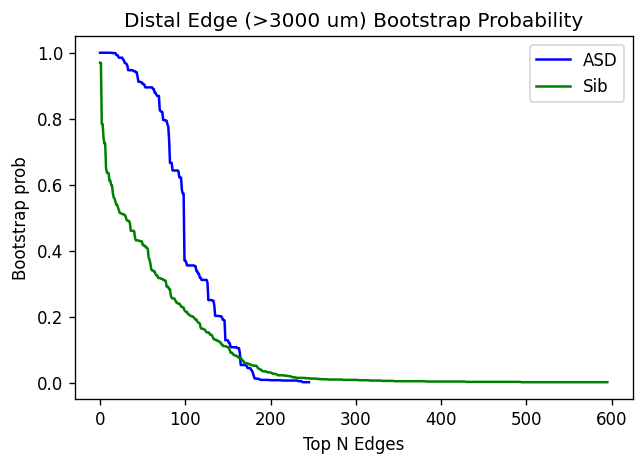

In [36]:
# Diff Region Dist
plt.figure(dpi=120)
xx1 = ASD_EdgeProbDF[ASD_EdgeProbDF["SameReg"]==1]
xx2 = Sib_EdgeProbDF[Sib_EdgeProbDF["SameReg"]==1]
print(xx1[xx1["Prob"]>0.5].shape[0], xx2[xx2["Prob"]>0.5].shape[0])
plt.plot(xx1.head(1000)["Prob"].values, label="ASD", color="blue")
plt.plot(xx2.head(1000)["Prob"].values, label="Sib", color="green")
plt.legend()
plt.title("Distal Edge (>3000 um) Bootstrap Probability")
plt.xlabel("Top N Edges")
plt.ylabel("Bootstrap prob")
plt.show()

In [37]:
99/31

3.193548387096774

230 87


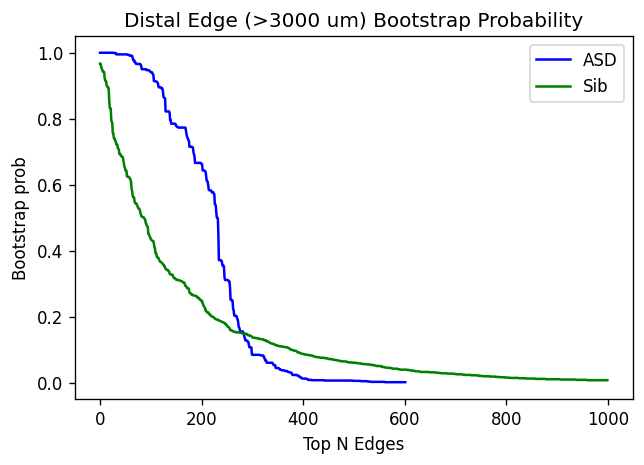

In [38]:
# Same Region Dist
plt.figure(dpi=120)
xx1 = ASD_EdgeProbDF[ASD_EdgeProbDF["SameReg"]==0]
xx2 = Sib_EdgeProbDF[Sib_EdgeProbDF["SameReg"]==0]
print(xx1[xx1["Prob"]>0.5].shape[0], xx2[xx2["Prob"]>0.5].shape[0])
plt.plot(xx1.head(1000)["Prob"].values, label="ASD", color="blue")
plt.plot(xx2.head(1000)["Prob"].values, label="Sib", color="green")
plt.legend()
plt.title("Distal Edge (>3000 um) Bootstrap Probability")
plt.xlabel("Top N Edges")
plt.ylabel("Bootstrap prob")
plt.show()

In [39]:
230/87

2.6436781609195403